In [1]:
!pip install bayesian-optimization

In [2]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.tree import export_graphviz
from bayes_opt import BayesianOptimization

%matplotlib inline
sns.set()

In [3]:
%cd ..

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis


In [4]:
cd data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\data\processed


In [5]:
df = pd.read_csv('3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
pd.set_option('display.max_columns',275)
df.head()

,Survey_ID,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,Other_Relative,Friends,Other,Full_Time_Employment,Part_Time_Employment,Self_Employed_Full_Time,Self_Employed_Part_Time,Student,Homemaker,Disabled,Unemployed,Retired,Other_Employement,Income,Achieving_Ends_Meet,US_Born,Duration_of_Residency,Primary_Language,English_Speaking,English_Difficulties,Familiarity_with_America,Familiarity_with_Ethnic_Origin,Identify_Ethnically,Belonging,Discrimination,Present_Health,Present_Mental_Health,Present_Oral_Health,Hygiene_Assistance,Smoking,Drinking,Regular_Exercise,Healthy_Diet,Hypertension,Diabetes,Arthritis,Physical_Check-up,Dentist_Check-up,Urgentcare,Folkmedicine,Primary_Care,Health_Insurance,Dental_Insurance,Unmet_Health_Need,Unmet_Dental_Needs,Transportation_(Medical),Interpretation_(Medical),Communication_Problem,Counseling_Ethnic_Preference,Users,Satisfaction,Family,Close_Friend,Acquaintances,Heal_Professionals,Mobile_Apps,Email,Social_Networks,Online_Communities,Health_Website,Other.1,Quality_of_Life,Satisfied_With_Life_1,Satisfied_With_Life_2,Psychiatrist,General_Practitioner,Therapist/Counselor,Religious_Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Medical_Ethnic_Preference,Knowledge,Diagnosed,Concern_for_Self_(AD),Concern_for_Others_(AD),Prevention,Plan_(AD),Education_(AD),Services_(AD),Language_Barrier_(AD),Fate_(AD),Aging_(AD),Embarrassing_(AD),Avoidance_(AD),Cure_(AD),Nursing_Home_(AD),Advanced_Directives,Have_an_Advanced_Directive,Superstition,See_Family,Close_Family,Helpful_Family,See_Friends,Close_Friends,Helpful_Friends,Family_Respect,Similar_Values,Successful_Family,Trust,Loyalty,Family_Pride,Expression,Spend_Time_Together,Feel_Close,Togetherness,Religious_Importance,Close-knit_Community,Helpful_Community,Community_Shares_Values,Get_Along,Community_Trust,Residency,Place_to_Live,Raising_Children,Place_to_Work,Small_Businesses,Place_to_Retire,Arts_and_Culture,Safety,Traffic,Austin_Quality_of_Life,Quality_of_Service,Parks_and_Recs,Libraries,Public_Safety,Airport,Austin_Energy,Court,Social_Services,Aware_of_AARC,Visit_Frequency,Activities,EMS_Classes,Fire_Alarm,Public_Computer,Library_Internet_Acess,Literature,Citizenship_Class,Small_Business,English_Classes,9-1-1,3-1-1,APD_Languages,District,Satisfaction_With_Housing.,Nursing_Home,Smoke_Detector,Recycle,Compost,Public_Transportation,Bicycling,Carpooling,Personal_Car,Car_Share,Walking,Other_Transportation,Access_to_a_Computer,Mobile_Devices,Home_Phone,Public_Meeting,Council_Meeting,Contact_City_Official,City_Election,Focus_Group,City_Effort_Satisfaction,Paper_(City-based),TV/Radio_(City-based),Website_(City-based),Social_Networks_(City-based),People_(City-based),Other_(City-based),Paper_(Non-city-based_Ethnic),TV/Radio_(Non-city-based_Ethnic),Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Satisfaction_Score,Gender_Female,Gender_Male,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese,Marital_Status_Living with a partner,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Religion_None,Religion_Other,Religion_Protestant,Occupation_0,Occupation_Business owner,"Occupation_Clerical, office, sales","Occupation_Manager, executive, or official",Occupation_Other,Occupation_Professional,Occupation_Semi-skilled,Occupation_Service worker,Occupation_Skilled trades,Language_Chinese Simplified,Language_Chinese Traditional,Language_Eng_Chinese only,Language_English,Language_Gujarati,Language_Hindi,Language_Korean,Language_Tagalog,Language_Viet

In [6]:
y = df['Satisfaction_Score']
x = df.drop(['Survey_ID','Satisfaction_Score', 'Quality_of_Life','Satisfied_With_Life_1','Satisfied_With_Life_2'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#from IPython.display import Audio
#sound_file = 'http://www.soundjay.com/button/beep-07.wav'
#Audio(sound_file, autoplay=True)

In [10]:
begin_time = datetime.datetime.now()
from sklearn import metrics
def lasso_fit(alpha):
    lasso = Lasso(
        alpha = float(alpha), 
        random_state=421)
    train_lasso = lasso.fit(x_train,y_train)
    y_pred = train_lasso.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    return rmse

In [12]:
lassoBO = BayesianOptimization(lasso_fit, {
    'alpha': (0.1,1.0)})
lassoBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        |  3.359    |  0.2074   |
|  2        |  3.343    |  0.1626   |
|  3        |  3.842    |  1.0      |
|  4        |  3.842    |  1.0      |
|  5        |  3.842    |  1.0      |
|  6        |  3.842    |  1.0      |
|  7        |  3.842    |  1.0      |
|  8        |  3.842    |  1.0      |
|  9        |  3.842    |  1.0      |
|  10       |  3.842    |  1.0      |
|  11       |  3.842    |  1.0      |
|  12       |  3.842    |  1.0      |


In [13]:
lassoBO.max
#Audio(sound_file, autoplay=True)

{'target': 3.8416735138741593, 'params': {'alpha': 1.0}}

In [14]:
test_params = lassoBO.max['params']

In [18]:
test_lasso = Lasso(random_state=42, **test_params)
test_lasso.fit(x_train,y_train)
y_pred = test_lasso.predict(x_test)
wall_clock = datetime.datetime.now() - begin_time

In [19]:
print(x_test.shape, np.shape(y_pred))

(522, 247) (522,)


In [20]:
from sklearn import metrics
print('RMSE: {} \n MAE: {}'.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 
    metrics.mean_absolute_error(y_test, y_pred)))

RMSE: 3.8416735138741593 
 MAE: 2.9701564283352364


In [38]:
coef = test_lasso.sparse_coef_
coefs = coef.todense().ravel()
coef_indices = np.argwhere(coefs>0)[:,1]
coef_indices
coef_values = coefs[:,coef_indices]
print(x.columns[coef_indices], coef_values)

Index(['English_Speaking', 'Present_Mental_Health', 'Present_Oral_Health',
       'Satisfaction_With_Housing.'],
      dtype='object') [[0.03208198 0.45649932 0.01253371 0.14197255]]


In [17]:
cd ..\..\models

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models


TypeError: only size-1 arrays can be converted to Python scalars

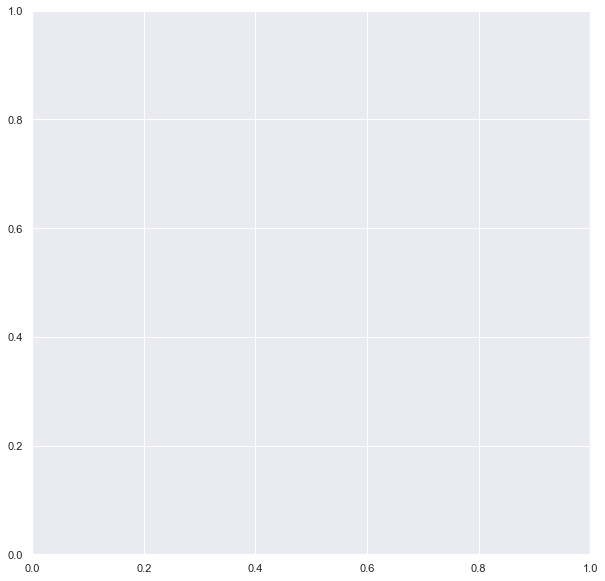

In [37]:
feature_importance = 100.0 * (coef_values / coef_values.max())
pos = np.arange(coef_indices.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, coef_values, align='center')
plt.yticks(pos, x.columns[coef_indices])
plt.xlabel('Relative Importance')
plt.title('Feature')
plt.title('Feature Importance - model 4.0.5 - trial 1- Random Forest with Bayesian Optimization')
f1 = plt.gcf()
plt.show()
f1.savefig('Feature Importance - model 4.0.5 - trial 1- Random Forest with Bayesian Optimization.png')

In [21]:
import csv
model_name = 'Model 4.0.5 - Random Forest with Bayesian Optimization'
values = [model_name,
          test_rf,
          np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
          metrics.mean_absolute_error(y_test, y_pred), 
          wall_clock]
out = csv.writer(open("Model 4.0.5 Performance Metrics - trial 1.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(values)

245